# CodeAlpha Task - 3  
## Data Visualization  


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load the Netflix dataset
df = pd.read_csv("C:/Users/maya9/Downloads/netflix_titles.csv/netflix_titles.csv")

# Show the first few rows
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
# Explore the Data

# Print the number of rows and columns in the dataset
print("Dataset contains", df.shape[0], "rows and", df.shape[1], "columns")

# Print all column names to understand what information is available
print("Column names:")
print(df.columns)

# Check for missing (null) values in each column
print("Missing values in each column:")
print(df.isnull().sum())

# Display the data type of each column (e.g., object, int, datetime)
print("Data types of each column:")
print(df.dtypes)


Dataset contains 8807 rows and 12 columns
Column names:
Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')
Missing values in each column:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64
Data types of each column:
show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


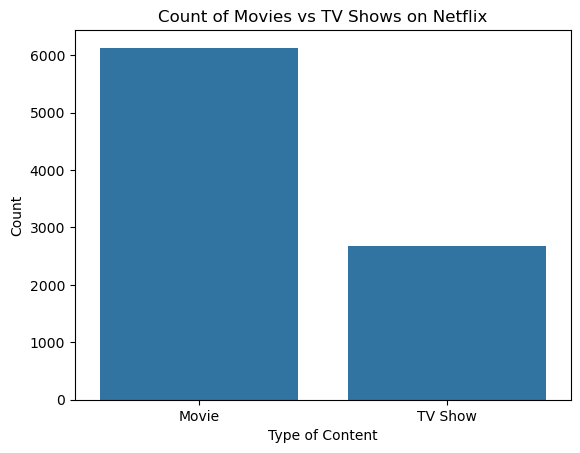

In [5]:
sns.countplot(data=df, x='type')
plt.title("Count of Movies vs TV Shows on Netflix")
plt.xlabel("Type of Content")
plt.ylabel("Count")
plt.show()


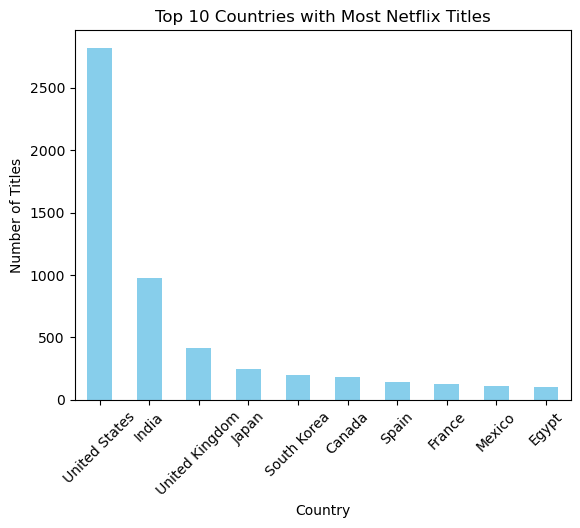

In [6]:
top_countries = df['country'].value_counts().head(10)

top_countries.plot(kind='bar', color='skyblue')
plt.title("Top 10 Countries with Most Netflix Titles")
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.show()


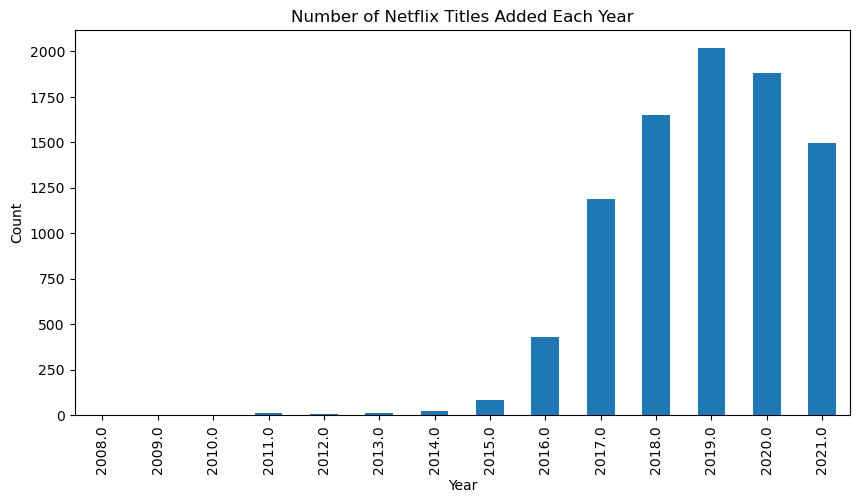

In [7]:
# Remove extra spaces and convert to datetime
df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), errors='coerce')

# Extract year
df['year_added'] = df['date_added'].dt.year

# Plot titles added by year
df['year_added'].value_counts().sort_index().plot(kind='bar', figsize=(10, 5))
plt.title("Number of Netflix Titles Added Each Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()


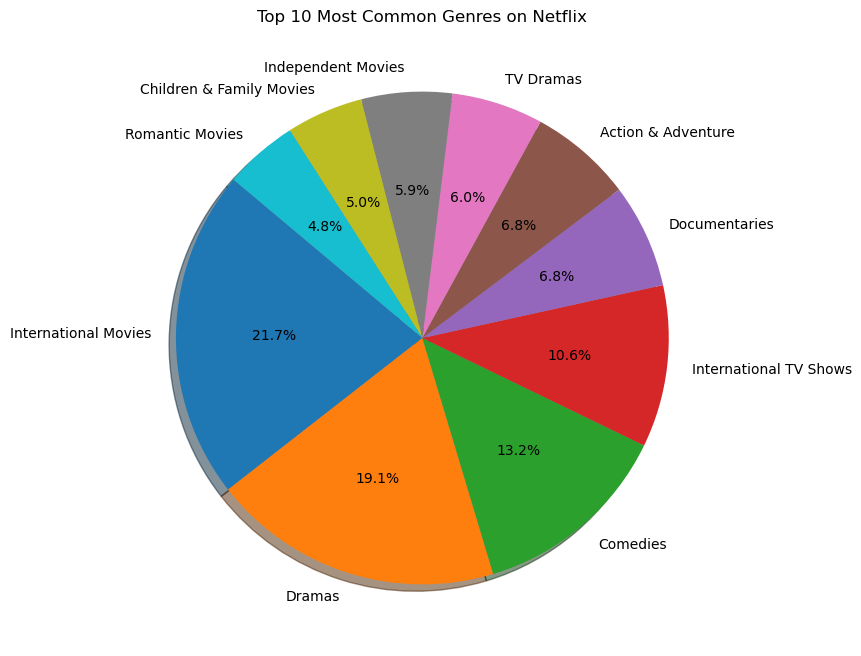

In [8]:
from collections import Counter  # Import Counter to count occurrences of each genre

# Split the 'listed_in' column (which contains genres) into lists, and remove any missing values
genres = df['listed_in'].dropna().str.split(', ')

# Flatten the list of genre lists into a single list of all genres
flat_list = [genre for sublist in genres for genre in sublist]

# Count each genre's frequency and get the top 10 most common ones
top_genres = pd.Series(Counter(flat_list)).nlargest(10)

# Plot the top 10 genres as a pie chart
top_genres.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), startangle=140, shadow=True)
plt.title("Top 10 Most Common Genres on Netflix")  # Add a title
plt.ylabel('')  # Remove y-label for better appearance
plt.show()  # Display the pie chart
